In [1]:
# Annotated example of usage of this package.
# Author: Xingchen Wan | xwan@robots.ox.ac.uk | Machine Learning Research Group, University of Oxford
# Date: 14 Dec 2019

# This notebook serves as a primer of how MLRG DeepCurvature package may be used in curvature analysis of deep neural networks and accompanying analyses.

from core import *
from visualise import *
import matplotlib.pyplot as plt

In [ ]:
# 1. Train a VGG16 network on CIFAR 100. Let's train for 100 epochs (this will take a while - on test computer with
# NVidia GeForce RTX 2080 Ti, each epoch of training takes ~ 10 seconds))
train_network(
    dir='result/VGG16-CIFAR100/',
    dataset='CIFAR100',
    data_path='data/',
    epochs=100,
    model='VGG16',
    optimizer='SGD',
    optimizer_kwargs={
        'lr': 0.03,
        'momentum': 0.9,
        'weight_decay': 5e-4
    }
)

In [ ]:
# Note: We get the result from a pre-cached run instead of the notebook because re-training the network is expensive, but if you run the cell above
# you should get similar result. 

# Now we call the plot_training function to visualise the training process

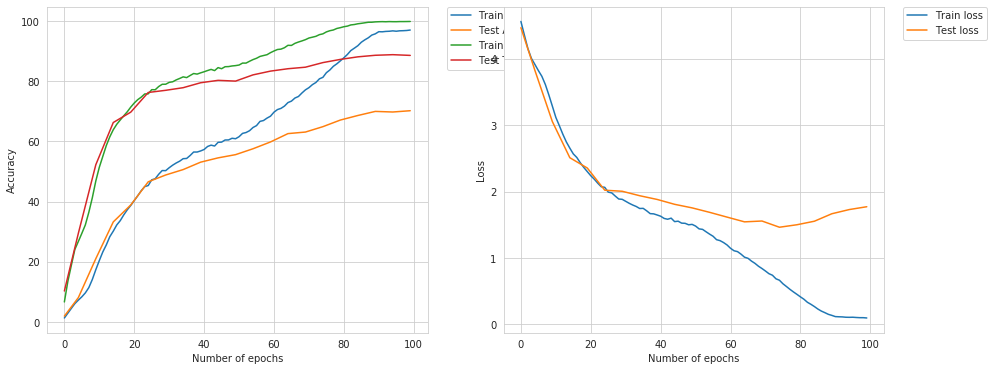

In [4]:
plt.figure(figsize=[15, 6])
plot_training(
    dir='result/VGG16-CIFAR100/',
    show_top_5=True, 
)
# In 100 epochs, our VGG16 architecture achieved a training accuracy of ~97% and testing accuracy of ~70%. This of course can be improved, by a more thorough
# hyperparameter tuning, more training epochs and a more modern neural network architecture.

In [ ]:
# 2. After this step, you should have a bunch of stats- and checkpoint files under the chosen dir. In this case, they
# are stored under .result/VGG16-CIFAR100. The stats files contains the key information of the training and testing (if
# that epoch is scheduled for testing) information, where the checkpoint-00XXX.pt contains the state_dict of the model
# and the optimizer that we need for later analyses.

# 3. Let's consider the spectrum on the 100th epoch (last training epoch)

# Let's first use the Lanczos estimation on the Generalised Gauss-Newton matrix - as a preliminary example, we run 20
# Lanczos interations

lanc = compute_eigenspectrum(
    dataset='CIFAR100',
    data_path='data/',
    model='VGG16',
    checkpoint_path='result/VGG16-CIFAR100/checkpoint-00100.pt',
    save_spectrum_path='result/VGG16-CIFAR100/spectra/spectrum-00100-ggn_lanczos',
    save_eigvec=True,
    lanczos_iters=20,
    curvature_matrix='ggn_lanczos',
)

/mnt/08B82010B81FFAC0/PyCharm Projects/MLRG_DeepCurvature/visualise/plot_spectrum.py:57: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')



 Spectral Statistics
Maximum Value is 9.305976
Minimum Value is 1.1138329e-05
Mean of Bulk is 3.1686826
number of negative eigenvalues
number of negative Ritz values
0
weight of negative Ritz values
0
pseudo log determinant
-11.401885
trace
7.322069e-05


degeneracy value = 0.9996466 at eigenvalue 1.1138329e-05
degeneracy value = 0.00020905338 at eigenvalue 0.055787943
degeneracy value = 8.851556e-05 at eigenvalue 0.17117196
degeneracy of largest eigenvalue = 4.6692634e-08 value = 9.305976
degeneracy of smallest eigenvalue = 8.851556e-05 value = 0.17117196


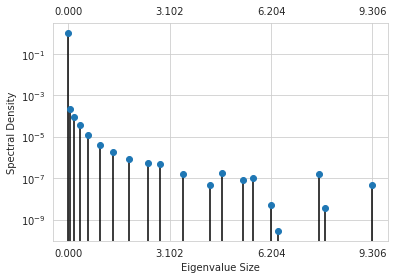

In [3]:
# 4. Visualise the result using a stem plot
plot_spectrum('lanczos', path='result/VGG16-CIFAR100/spectra/spectrum-00100-ggn_lanczos.npz')

In [ ]:
# The plot above gives 20 Ritz value and their corresponding estimated spectral density - note that it is in log scale. Since we use the generalised Gauss-newton
# which is a positive semi-definite matrix, we do not observe negative eigenvalues (we usually expect negative eigenvalues for the Hessian, for example since by
# default, the curvature matrix is computed w.r.t the entire dataset and not just the training dataset.)

# We clearly see the low-rank sturcture by the huge spike of the zero eigenvalues - With only 20 eigenvalues, we cannot clearly tell the difference between the 
# bulk and the outliers in this particular example, but increasing the number of Lanczos iterations will enable you to see this feature.

In [ ]:
# 5. Visualise loss landscape
build_loss_landscape(
    dataset='CIFAR100',
    data_path='data/',
    model='VGG16',
    spectrum_path='result/VGG16-CIFAR100/spectra/spectrum-00100-ggn_lanczos',
    checkpoint_path='result/VGG16-CIFAR100/checkpoint-00100.pt',
    save_path='result/VGG16-CIFAR100/losslandscape-00100.npz'
)

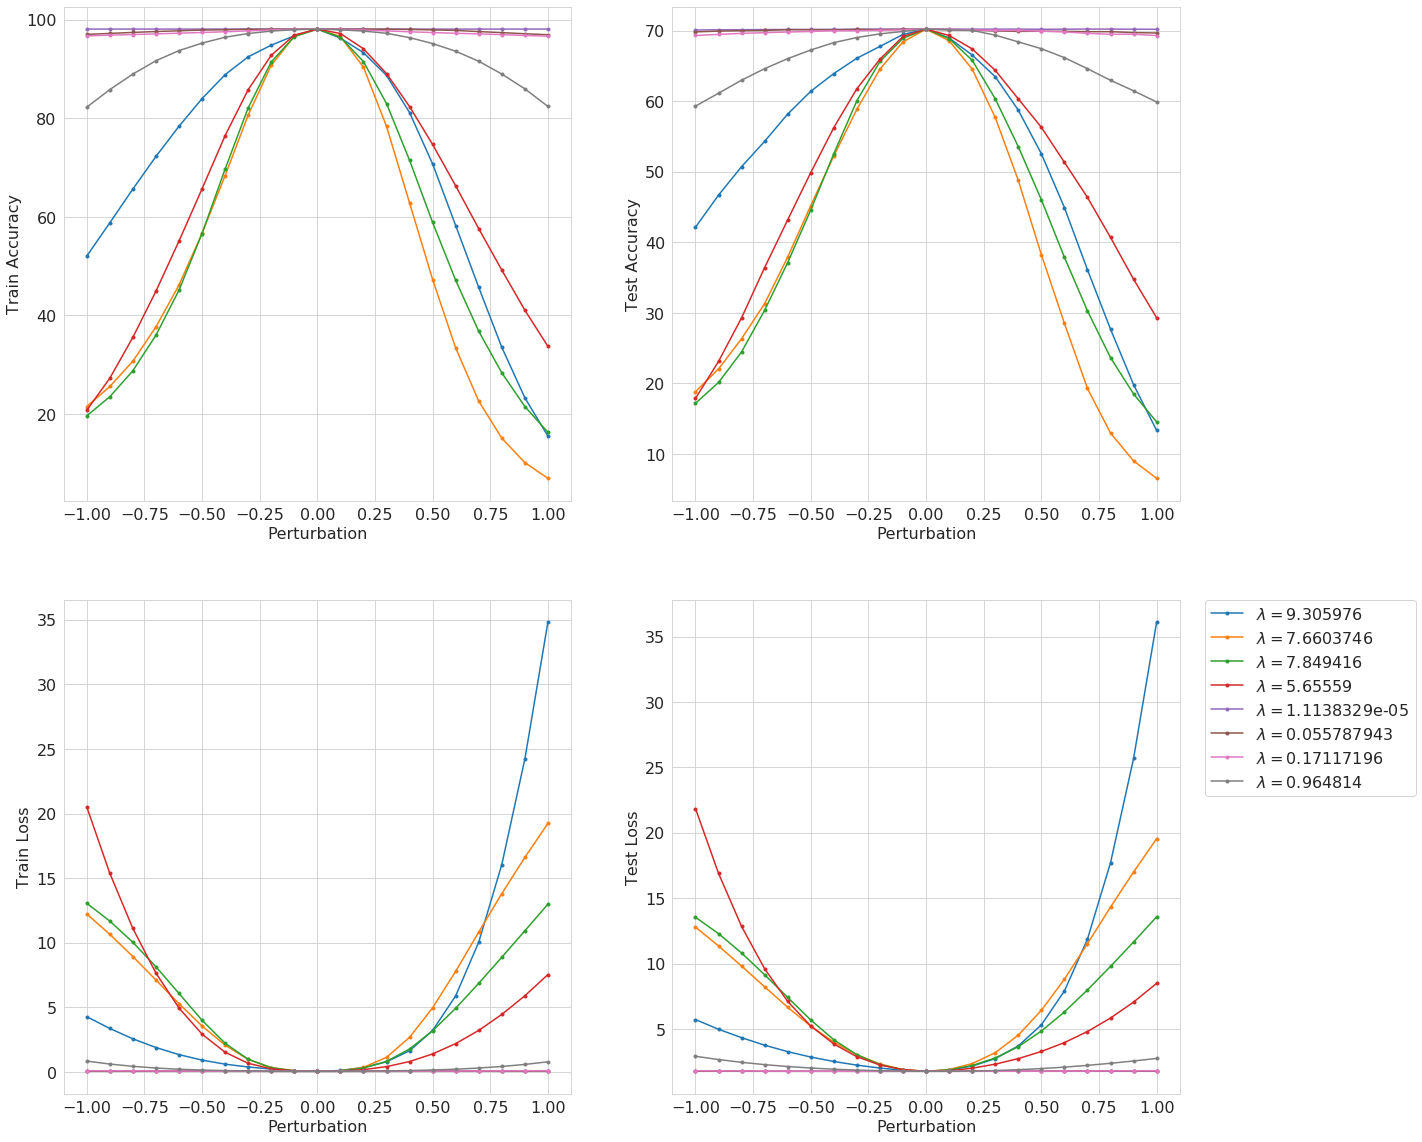

In [5]:
plt.figure(figsize=[20, 20])
plot_loss_landscape('result/VGG16-CIFAR100/losslandscape-00100.npz')

In [ ]:
# This shows the sensitivity of the test/training loss/accuracy to different eigenvector directions - note that we have chosen a rather large step (distance of 1)
# this could be adjusted accordingly if you want to have a more local view near the point in the weight space at the end of training.